
# 10分钟快速上手飞桨

从完成一个简单的『手写数字识别任务』开始，可快速了解深度学习模型开发的大致流程，并初步掌握飞桨框架 API 的使用方法。

## 一、快速安装飞桨

如果已经安装好飞桨那么可以跳过此步骤。飞桨支持很多种安装方式，这里介绍其中一种简单的安装命令。

> 注：目前飞桨支持 Python 3.6 ~ 3.9 版本，pip3 要求 20.2.2 或更高版本，请提前安装对应版本的 Python 和 pip 工具。


In [2]:
# 使用 pip 工具安装飞桨 CPU 版
! python3 -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

该命令用于安装 CPU 版本的飞桨。如果要安装其他计算平台或操作系统支持的版本，可点击 [ 快速安装]( <https://www.paddlepaddle.org.cn/install/quick>)  查看安装引导。

## 二、导入飞桨

安装完成后，需要在Python解释器中使用 import 导入飞桨，即可开始实践深度学习任务。

若操作成功，会输出飞桨的版本号。

In [3]:
import paddle    
print(paddle.__version__)

2.2.1




## 三、实践：手写数字识别任务

『手写数字识别』是深度学习里的 Hello World 任务，用于对 0 ~ 9 的十类数字进行分类，即输入手写数字的图片，可识别出这个图片中的数字。

本任务用到的数据集为 [MNIST 手写数字数据集](http://yann.lecun.com/exdb/mnist/)，用于训练和测试模型。该数据集包含 60000 张训练图片、 10000 张测试图片、以及对应的分类标签文件，每张图片上是一个 0 ~ 9 的手写数字，分辨率为 28 * 28。部分图像和对应的分类标签如下图所示。

![](images/mnist.png)

图 1：MNIST 数据集样例

开始之前，需要使用下面的命令安装 Python 的 matplotlib 库和 numpy 库，matplotlib 库用于可视化图片，numpy 库用于处理数据。

In [3]:
# 使用 pip 工具安装 matplotlib 和 numpy
! python3 -m pip install matplotlib numpy -i https://mirror.baidu.com/pypi/simple

下面是手写数字识别任务的完整代码，如果想直接运行代码，可以拷贝下面的完整代码到一个Python文件中运行。

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5
step 938/938 [==============================] - loss: 0.0519 - acc: 0.9344 - 14ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0239 - acc: 0.9767 - 14ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.0416 - acc: 0.9811 - 14ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 0.0084 - acc: 0.9837 - 14ms/step          
Epoch 5/5
step 938/938 [==============================] - loss: 0.0838 - acc: 0.9860 - 14ms/step          
Eval begin...
step 157/157 [==============================] - loss: 1.7577e-04 - acc: 0.9844 - 6ms/step         
Eval samples: 10000
true label: 7, pred label: 7


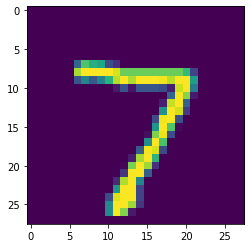

In [5]:
import paddle
import numpy as np
from paddle.vision.transforms import Normalize

transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')
# 下载数据集并初始化 DataSet
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

# 模型组网并初始化网络
lenet = paddle.vision.models.LeNet(num_classes=10)
model = paddle.Model(lenet)

# 模型训练的配置准备，准备损失函数，优化器和评价指标
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()), 
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())

# 模型训练
model.fit(train_dataset, epochs=5, batch_size=64, verbose=1)
# 模型评估
model.evaluate(test_dataset, batch_size=64, verbose=1)

# 保存模型
model.save('./output/mnist')
# 加载模型
model.load('output/mnist')

# 从测试集中取出一张图片
img, label = test_dataset[0]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print('true label: {}, pred label: {}'.format(label[0], pred_label))
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])

以上代码使用 MNIST 数据集训练并测试了 LeNet 模型，并最终成功推理出了一张手写数字图片的标签，该图片推理结果是 7 （ pred label: 7），真实标签也是7 （true label: 7）。

简单地说，深度学习任务一般分为以下几个核心步骤：


1. 数据集定义与加载
2. 模型组网
3. 模型训练与评估
4. 模型推理

接下来逐个步骤介绍，帮助你快速掌握使用飞桨框架实践深度学习任务的方法。


###  3.1 数据集定义与加载

飞桨在 [paddle.vision.datasets](../../api/paddle/vision/Overview_cn.html#api) 下内置了计算机视觉（Computer Vision，CV）领域常见的数据集，如 MNIST、Cifar10、Cifar100、FashionMNIST 和 VOC2012 等。在本任务中，先后加载了 MNIST 训练集（`mode='train'`）和测试集（`mode='test'`），训练集用于训练模型，测试集用于评估模型效果。

In [2]:
import paddle
from paddle.vision.transforms import Normalize

transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')
# 下载数据集并初始化 DataSet
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

# 打印数据集里图片数量
print('{} images in train_dataset, {} images in test_dataset'.format(len(train_dataset), len(test_dataset)))

60000 images in train_dataset, 10000 images in test_dataset


飞桨除了内置了 CV 领域常见的数据集，还在 [paddle.text](../../api/paddle/text/Overview_cn.html#api) 下内置了自然语言处理（Natural Language Processing，NLP）领域常见的数据集，并提供了自定义数据集与加载功能的 [paddle.io.Dataset](../../api/paddle/io/Dataset_cn.html#dataset) 和 [paddle.io.DataLoader](../../api/paddle/io/DataLoader_cn.html#dataloader) API，详细使用方法可参考『数据集定义与加载』 章节。


另外在 [paddle.vision.transforms](../..api/paddle/vision/Overview_cn.html) 下提供了一些常用的图像变换操作，如对图像的翻转、裁剪、调整亮度等处理，可实现数据增强，以增加训练样本的多样性，提升模型的泛化能力。本任务在初始化 MNIST 数据集时通过 `transform` 字段传入了 `Normalize` 变换对图像进行归一化，对图像进行归一化可以加快模型训练的收敛速度。该功能的具体使用方法可参考『数据预处理』 章节。


更多参考：
* [数据集定义与加载](data_load_cn.html)
* [数据预处理](data_preprocessing_cn.html)


###  3.2 模型组网

飞桨的模型组网有多种方式，既可以直接使用飞桨内置的模型，也可以自定义组网。


『手写数字识别任务』比较简单，普通的神经网络就能达到很高的精度，在本任务中使用了飞桨内置的 LeNet 作为模型。飞桨在 [paddle.vision.models](../../api/paddle/vision/Overview_cn.html#about-models) 下内置了 CV 领域的一些经典模型，LeNet 就是其中之一，调用很方便，只需一行代码即可完成 LeNet 的网络构建和初始化。`num_classes` 字段中定义分类的类别数，因为需要对 0 ~ 9 的十类数字进行分类，所以设置为 10。

另外通过 [paddle.summary](../../api/paddle/summary_cn.html#summary) 可方便地打印网络的基础结构和参数信息。

In [3]:
# 模型组网并初始化网络
lenet = paddle.vision.models.LeNet(num_classes=10)

# 可视化模型组网结构和参数
paddle.summary(lenet,(1, 1, 28, 28))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Conv2D-1       [[1, 1, 28, 28]]      [1, 6, 28, 28]          60       
    ReLU-1        [[1, 6, 28, 28]]      [1, 6, 28, 28]           0       
  MaxPool2D-1     [[1, 6, 28, 28]]      [1, 6, 14, 14]           0       
   Conv2D-2       [[1, 6, 14, 14]]     [1, 16, 10, 10]         2,416     
    ReLU-2       [[1, 16, 10, 10]]     [1, 16, 10, 10]           0       
  MaxPool2D-2    [[1, 16, 10, 10]]      [1, 16, 5, 5]            0       
   Linear-1          [[1, 400]]            [1, 120]           48,120     
   Linear-2          [[1, 120]]            [1, 84]            10,164     
   Linear-3          [[1, 84]]             [1, 10]              850      
Total params: 61,610
Trainable params: 61,610
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 0.00
Forward/backward

{'total_params': 61610, 'trainable_params': 61610}

通过飞桨的 [paddle.nn.Sequential](../../api/paddle/nn/Sequential_cn.html) 和 [paddle.nn.Layer](../../api/paddle/nn/Layer_cn.html) API 可以更灵活方便的组建自定义的神经网络，详细使用方法可参考『模型组网』章节。

更多参考：
* [模型组网](model_cn.html)

### 3.3 模型训练与评估

#### 3.3.1 模型训练

模型训练需完成如下步骤：

1. **使用 [paddle.Model](../../api/paddle/Model_cn.html) 封装模型。**  将网络结构组合成可快速使用 [飞桨高层 API](../../practices/quick_start/high_level_api.html) 进行训练、评估、推理的实例，方便后续操作。
2. **使用 [paddle.Model.prepare](../../api/paddle/Model_cn.html#prepare-optimizer-none-loss-none-metrics-none-amp-configs-none) 完成训练的配置准备工作。**  包括损失函数、优化器和评价指标等。飞桨在 [paddle.optimizer](../../api/paddle/optimizer/Overview_cn.html#api) 下提供了优化器算法相关 API，在 [paddle.nn Loss层](../../api/paddle/nn/Overview_cn.html#loss) 提供了损失函数相关 API，在 [paddle.metric](../../api/paddle/metric/Overview_cn.html) 下提供了评价指标相关 API。
3. **使用 [paddle.Model.fit](../../api/paddle/Model_cn.html#fit-train-data-none-eval-data-none-batch-size-1-epochs-1-eval-freq-1-log-freq-10-save-dir-none-save-freq-1-verbose-2-drop-last-false-shuffle-true-num-workers-0-callbacks-none) 配置循环参数并启动训练。**  配置参数包括指定训练的数据源 `train_dataset`、训练的批大小 `batch_size`、训练轮数 `epochs` 等，执行后将自动完成模型的训练循环。


因为是分类任务，这里损失函数使用常见的 [CrossEntropyLoss](../../api/paddle/nn/CrossEntropyLoss_cn.html#crossentropyloss) （交叉熵损失函数），优化器使用 [Adam](../../api/paddle/optimizer/Adam_cn.html#adam)，评价指标使用 [Accuracy](../../api/paddle/metric/Accuracy_cn.html#accuracy) 来计算模型在训练集上的精度。

In [5]:
# 封装模型，便于进行后续的训练、评估和推理
model = paddle.Model(lenet)

# 模型训练的配置准备，准备损失函数，优化器和评价指标
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()), 
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())

# 开始训练
model.fit(train_dataset, epochs=5, batch_size=64, verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5
step 938/938 [==============================] - loss: 0.0011 - acc: 0.9865 - 14ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0045 - acc: 0.9885 - 14ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.0519 - acc: 0.9896 - 14ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 4.1989e-05 - acc: 0.9912 - 14ms/step      
Epoch 5/5
step 938/938 [==============================] - loss: 0.0671 - acc: 0.9918 - 15ms/step            


从训练过程的打印日志中，可观察到损失函数值 loss 逐渐变小，精度 acc 逐渐上升的趋势，反映出不错的训练效果。

#### 3.3.2 模型评估

模型训练完成之后，调用 [paddle.Model.evaluate](../../api/paddle/Model_cn.html#evaluate-eval-data-batch-size-1-log-freq-10-verbose-2-num-workers-0-callbacks-none) ，使用预先定义的测试数据集，来评估训练好的模型效果，评估完成后将输出模型在测试集上的损失函数值 loss 和精度 acc。


In [6]:
# 进行模型评估
model.evaluate(test_dataset, batch_size=64, verbose=1)

Eval begin...
step 157/157 [==============================] - loss: 5.7177e-04 - acc: 0.9859 - 6ms/step         
Eval samples: 10000


{'loss': [0.00057177414], 'acc': 0.9859}

从结果可以看到，初步训练得到的模型精度在98%附近，在逐渐熟悉深度学习模型开发和训练技巧后，可以通过调整其中的训练参数来进一步提升模型的精度。

更多参考：
* [模型训练、评估与推理](train_eval_predict_cn.html)

### 3.4 模型推理



#### 3.4.1 模型保存

模型训练完成后，通常需要将训练好的模型参数和优化器等信息，持久化保存到参数文件中，便于后续执行推理验证。

在飞桨中可通过调用 [paddle.Model.save](../../api/paddle/Model_cn.html#save-path-training-true) 保存模型。代码示例如下，其中 output 为模型保存的文件夹名称，minst 为保存的模型文件名称。

In [5]:
# 保存模型，文件夹会自动创建
model.save('./output/mnist')

以上代码执行后会在`output`目录下保存两个文件，`mnist.pdopt`为优化器的参数，`mnist.pdparams`为模型的参数。
```bash
output
├── mnist.pdopt     # 优化器的参数
└── mnist.pdparams  # 模型的参数
```


#### 3.4.2 模型加载并执行推理

执行模型推理时，可调用 [paddle.Model.load](../../api/paddle/Model_cn.html#load-path-skip-mismatch-false-reset-optimizer-false) 加载模型，然后即可通过 [paddle.Model.predict_batch](../../api/paddle/Model_cn.html#predict-batch-inputs) 执行推理操作。

如下示例中，针对前面创建的 `model` 网络加载保存的参数文件 `output/mnist`，并选择测试集中的一张图片 `test_dataset[0]` 作为输入，执行推理并打印结果，可以看到推理的结果与可视化图片一致。


true label: 7, pred label: 7


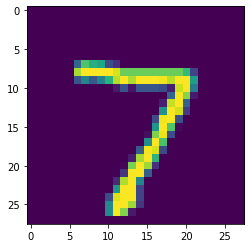

In [10]:
# 加载模型
model.load('output/mnist')

# 从测试集中取出一张图片
img, label = test_dataset[0]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print('true label: {}, pred label: {}'.format(label[0], pred_label))
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])

更多参考：
* [模型保存与加载](model_save_load_cn.html)
* [模型训练、评估与推理](train_eval_predict_cn.html)


## 四、总结

至此通过飞桨几个简单的API完成了一个深度学习任务，总结整个流程和用到的关键 API 如下图所示。

![](images/model_develop_flow.png)

图 2：模型开发流程

如果想要完成更复杂的深度学习任务，开发更强大的模型，飞桨提供了功能丰富的 API 帮助开发者完成任务，比如对数据集应用数据增强、使用更大的 CNN 模型、调优性能等。飞桨官网提供了丰富的教程与案例可供参考，欢迎一起探索深度学习的世界。